# Umbralización y Operaciones Morfológicas

En esta práctica, se aprenderán los conceptos de umbralizado y operaciones mofológicas con OpenCV. Se aprenderá a aplicar las siguientes funciones en una imagen:
<ul>
<li>Umbralizado Simple</li>
<li>Umbralizado <i>Otsu</i></li>
<li>Umbralizado Adaptativo</li>
<li>Erosión</li>
<li>Dilatación</li>
<li>Apertura</li>
<li>Cerradura</li>
</ul>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (20, 20))
  for i, p in enumerate(images):
    axs[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

## Umbralizado

El umbralizado es una técnica sencilla de segmentación utilizada en visión por computadora que permite separar el primer plano y el fondo de la imagen. El umbral es una técnica de OpenCV que asigna los valores de los píxeles en relación con un valor de umbral determinado. Cada valor de píxel se compara con el valor del umbral durante el umbralizado. Si el valor del píxel es menor que el umbral, se establece en 0, de lo contrario se establece en el máximo valor posible (generalmente 255).

<center><img src='Recursos\Puente.jpg' width=400><img src='Recursos\Puente_Umbralizado.jpg' width=400></center>
<figcaption>Fuente <a href='https://en.wikipedia.org/wiki/Thresholding_(image_processing)'>Wikipedia</a><br>
<a href='https://commons.wikimedia.org/w/index.php?curid=4015420'>Andrew KrizhanovskyРусский: Андрей Крижановский</a></figcaption>

En la visión por computadora, esta técnica de umbralización se realiza en imágenes en escala de grises. Así que inicialmente, la imagen tiene que ser convertida en el espacio de color de escala de grises.

### Tipos de Umbralizado

El umbralizado se clasifica en tres tipos:

<ul>
    <li>El <b>umbralizado simple</b>, en el que damos manualmente los ajustes para segmentar la imagen; esto funciona excepcionalmente bien en situaciones de iluminación controlada en las que podemos asegurar un contraste significativo entre el primer plano y el fondo de la imagen.</li>
    <li>El <b>umbralizado de <i>Otsu</i></b> que intenta ser más dinámico y calcular automáticamente el valor óptimo del umbral en función de la imagen de entrada.</li>
    <li>La <b>umbralización adaptativa</b> divide una imagen en bits más pequeños y umbraliza cada uno de estos componentes por separado y de forma individual, en lugar de intentar umbralizar una imagen de forma global utilizando un único valor.</li>
</ul>

### Umbralizado Global (Simple)

Un ejemplo sencillo de umbralización sería seleccionar un valor de umbral $T$, y luego establecer todas las intensidades de los píxeles menores que $T$ a $0$, y todos los valores de los píxeles mayores que $T$ a $255$. De este modo, podemos crear una representación binaria de la imagen.

$
dst(x,y)=\begin{cases}255 & if\space src(x,y) > T\\0 & de \space lo \space contrario\end{cases}
$

También podríamos aplicar la inversa de esta umbralización estableciendo todos los píxeles menores que $T$ a $255$ y todas las intensidades de los píxeles mayores que $T$ a $0$.

$
dst(x,y)=\begin{cases}255 & if\space src(x,y) < T\\0 & de \space lo \space contrario\end{cases}
$

El umbralizado es una técnica de segmentación muy popular para distinguir un objeto en primer plano de su fondo, veamos un ejemplo de como separar elementos del primer plano y recuperar información.

#### Uso de OpenCV para implementar un umbralizado simple

Se visualiza un código que utiliza métodos simples de umbralización. Para realizar este proceso en OpenCV, se utiliza el comando `cv2.threshold()`, que permite hacer el umbralizado simple. Para este ejemplo se utiliza la siguiente imagen.

<center><img src='Imagenes\Monedas.jpg' width=400></center>

#### Sintaxis de Función

``` python
retval, dst = cv2.threshold(src, thresh, maxval, _type)
```

`retval`: Valor de umbral `thresh` introducido en la funcion.<br>
`dst`: Matriz de salida del mismo tamaño y tipo y del mismo número de canales que `src`.

La función tiene **4 argumento de entrada requeridos**:

1. `src`: Imagen de entrada. Es un argumento **obligatorio**.
2. `thresh`: Valor de umbral. Es un argumento **obligatorio**.
3. `maxval`: Valor máximo para los tipos de umbral. Es un argumento **obligatorio**.
4. `_type`: Tipo de umbralizado. Es un argumento **obligatorio**.

**Tipos de umbralizado**
<ul>
<li><code>cv2.THRESH_BINARY</code>: Umbralizado binario
<li><code>cv2.THRESH_BINARY_INV</code>: Umbralizado binario inverso
<li><code>cv2.THRESH_TRUNC</code>: Umbralizado truncado
<li><code>cv2.THRESH_TOZERO</code>: Umbralizado a cero
<li><code>cv2.THRESH_TOZERO_INV</code>: Umbralizado a cero inverso
</ul>

<center><img src='Recursos\TiposUmbralizado.png' height='500'></center>

En el siguiente ejemplo de código, se utiliza la función `cv2.threshold()`. Para comenzar, se utiliza el valor $127$ para el umbralizado.

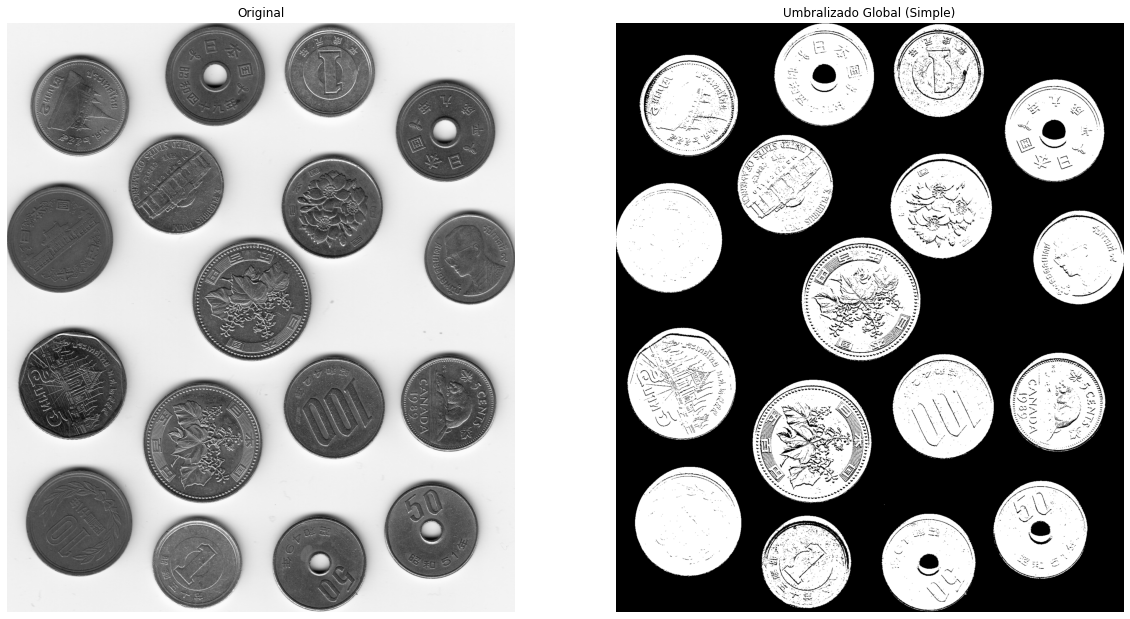

In [7]:
img = cv2.imread('Imagenes/Monedas.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

imagenes = [img, img_thresh]
titulos = ['Original', 'Umbralizado Global (Simple)']

plot_img(imagenes, titulos)

Se ha logrado segmentar las monedas del fondo. Aunque esto no parezca especialmente interesante, poder dividir una imagen en secciones es una habilidad muy útil. Esto quedará más claro cuando se profundice en los contornos y los utilicemos para medir e identificar diversos elementos de una imagen.

Para mejorar los resultados, es posible modificar el valor de $T$ hasta obtener un resultado mas preciso, dependiendo de las aplicaciones que se busquen. Sin embargo, este proceso puede ser repetitivo y varía dependiendo de las condiciones de iluminación de la imagen, por lo que no es factible usar el umbralizado simple para programas que corran continuamente.

Por el momento, pasemos a algunas estrategias de umbralización más complejas que no requieren que introduzcamos explícitamente un número $T$.

### Umbralizado <i>Otsu</i>

En la sección anterior sobre umbralización glocal tuvimos que introducir manualmente un valor de umbral $T$. Podríamos forzar este número para fotos básicas en circunstancias de iluminación controlada. Sin embargo, en situaciones del mundo real cuando no tenemos conocimiento previo de las condiciones de iluminación, utilizamos el enfoque de <i>Otsu</i> para calcular automáticamente un valor ideal de $T$.

La técnica de Otsu supone que nuestra imagen tiene dos tipos de píxeles: <b>fondo</b> y <b>primer plano</b>.

Además, la técnica de Otsu supone que el histograma en escala de grises de las intensidades de los píxeles de nuestra imagen es <i>bimodal</i>, lo que implica esencialmente que el histograma tiene dos picos.

A continuación, el método de Otsu calcula un valor de umbral T adecuado basado en el histograma de la escala de grises, de forma que se minimice la variación entre los picos del fondo y del primer plano. La técnica de Otsu, sin embargo, no tiene conocimiento previo de qué píxeles pertenecen al primer plano y cuáles al fondo, sólo intenta separar lo mejor posible los picos del histograma.

La función `cv2.threshold` de OpenCV se utiliza para implementar la técnica de Otsu. Esta vez, enviamos tanto el tipo de umbralización (normal, invertido, etc.) como la bandera de la técnica de Otsu `cv2.THRESH_OTSU` en la entrada de `_type`. Para la segunda opción, teóricamente podríamos proporcionar cualquier valor que deseemos, ya que no se tomará en cuenta para la umbralización.



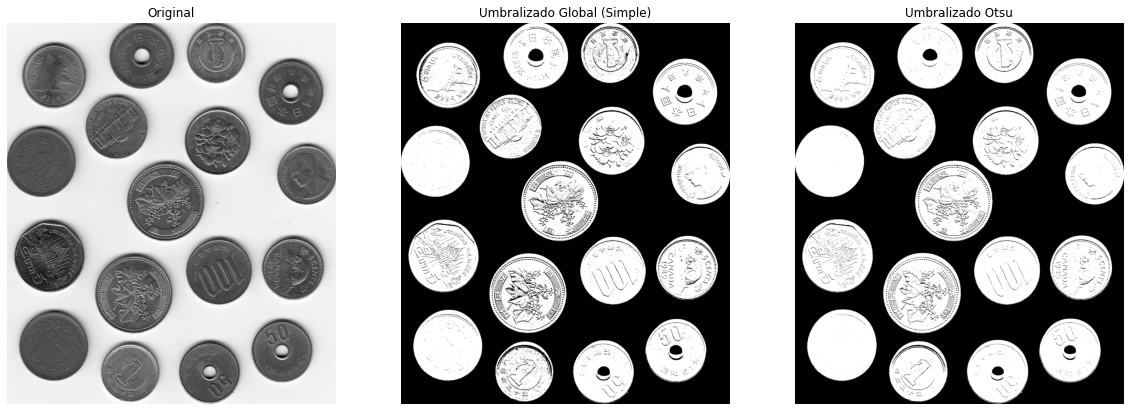

In [8]:
retval, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imagenes.append(otsu)
titulos.append('Umbralizado Otsu')
plot_img(imagenes, titulos)

Ni siquiera se tuvo que presentar el valor $T$ porque el método de Otsu lo manejó por su cuenta. Aun así, se obtuvo una buena imagen de umbral como resultado. El parámetro devuelto `retval` puede revelar qué valor se utilizó para aplicar el umbral.

In [9]:
print(retval)

158.0


Vemos que la estimación de Otsu no está tan alejada del valor inicial $T$ que se tomó para el umbralizado simple.

A la vista, el valor de $T$ producido por el enfoque de Otsu puede no ser el óptimo: se puede detectar claramente el relieve en las monedas de la imagen umbralizada. Sin embargo, este número es ideal en el sentido de que hace el mayor trabajo de separación entre el primer plano y el fondo dada una distribución bimodal de los valores de los píxeles en escala de grises.

Si la imagen en escala de grises no tiene una distribución bimodal, el método de Otsu seguirá funcionando, pero puede no proporcionar los resultados deseados. Se pueden encontrar problemas importantes cuando las condiciones de iluminación no son consistentes, como cuando varias secciones de la imagen están más iluminadas que otras.

### Umbralizado adaptativo

Los dos enfoques mencionados anteriormente son técnicas de umbralización global. Lo que significa que se utiliza el mismo valor de $T$ para analizar todos los píxeles de la imagen de entrada, dividiéndolos en primer plano y fondo.

El problema es que tener un solo valor de $T$ puede no ser suficiente. Debido a los cambios en la iluminación, las sombras, etc., un valor de $T$ puede funcionar para una parte de la imagen de entrada pero fallar completamente en otra. En tales circunstancias, se puede utilizar el umbral adaptativo en su lugar.

La umbralización adaptativa, como su nombre indica, tiene en cuenta una pequeña colección de píxeles cercanos a la vez, calcula T para esa región local específica y luego ejecuta la segmentación.
La umbralización adaptativa, dependiendo del proyecto, puede proporcionar una mejor segmentación que los enfoques de umbralización global, como la umbralización básica y la umbralización de Otsu.

### Uso de OpenCV para implementar un umbralizado adaptativo

La umbralización adaptativa determina el valor del umbral para cada píxel de forma individual basándose en una pequeña región a su alrededor. Como resultado, obtenemos varios umbrales para diferentes secciones de la imagen, y esta estrategia funciona bien en fotografías con iluminación variada. Para realizar el umbral adaptativo, OpenCV proporciona la función de umbral adaptativo con el comando `cv2.adaptativeThreshold()`.

#### Sintaxis de Función

``` python
dst = cv2.adaptativeThreshold(src, maxval, adaptativeMethod,  thresholdType, blockSize, C)
```

`dst`: Imagen de destino del mismo tamaño y del mismo tipo que `src`.

La función tiene **5 argumento de entrada requeridos**:

<ol>
<li><code>src</code>: Fuente de imagen monocanal de 8 bits. Es un argumento <b>obligatorio</b>.
<br>
<li><code>maxval</code>: Valor no nulo asignado a los píxeles para los que se cumple la condición. Es un argumento <b>obligatorio</b>.
<br>
<li><code>adaptativeMethod</code>: Algoritmo de umbralización adaptable a utilizar. Es un argumento <b>obligatorio</b>.
    <ul>
    <b>Banderas</b>
    <li><b><code>cv2.ADAPTIVE_THRESH_MEAN_C</code></b>: El valor del umbral T(x,y) es el promedio de la vecindad blockSize×blockSize de (x,y) menos C
    <li><b><code>cv2.ADAPTIVE_THRESH_GAUSSIAN_C</code></b>: El valor umbral T(x,y) es una suma ponderada (correlación cruzada con una ventana gaussiana) de la vecindad blockSize×blockSize de (x,y) menos C.
    </ul>
<br>
<li><code>thresholdType</code>: Tipo de umbral que debe ser <code>THRESH_BINARY</code> o <code>THRESH_BINARY_INV</code>. Es un argumento <b>obligatorio</b>.
<li><code>blockSize</code>: Tamaño de una vecindad de píxeles que se utiliza para calcular un valor de umbral para el píxel: 3, 5, 7, etc. Es un argumento <b>obligatorio</b>.
<li><code>C</code>: Constante que se resta a la media o a la media ponderada. Normalmente, es positiva, pero también puede ser cero o negativa. Es un argumento <b>obligatorio</b>.
</ol>

Esta función se utiliza para arreglar una imagen con iluminación variable, y para poder recuperar información de texto.

<center><img src='Imagenes\Pagina Libro B.jpeg' width=400></center>

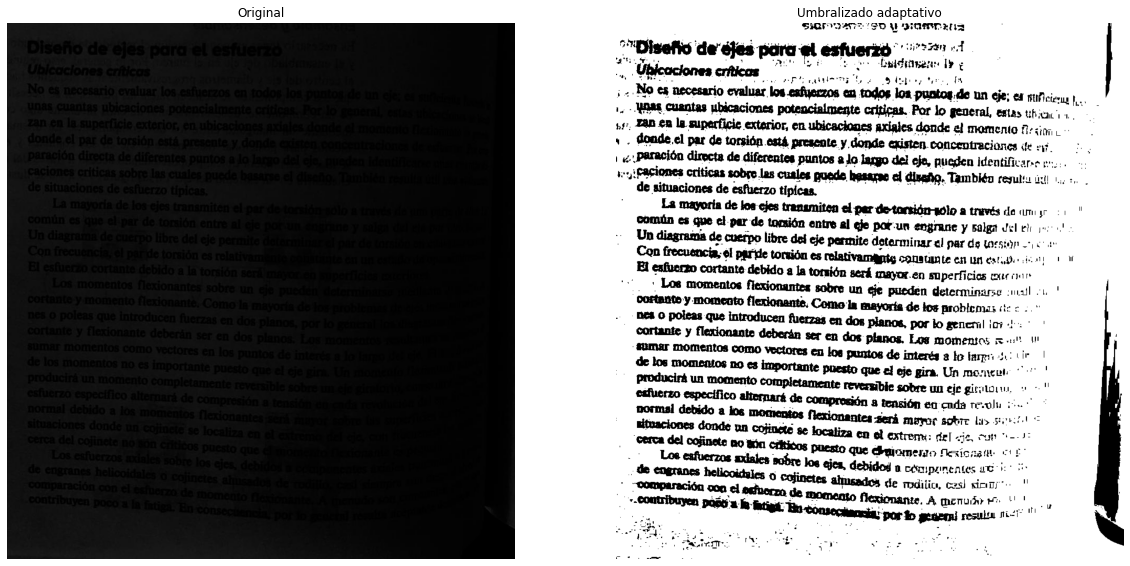

In [10]:
imagenes.clear()
titulos.clear()

img_b = cv2.imread('Imagenes/Pagina Libro B.jpeg', cv2.IMREAD_GRAYSCALE)

adapt = cv2.adaptiveThreshold(img_b, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 99, 2.5)

imagenes = [img_b, adapt]
titulos = ['Original', 'Umbralizado adaptativo']

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

Se observa que la legibilidad se incrementa considerablemente. Esta estrategia es quizá la más eficaz. Cabe mencionar, sin embargo, que es la más computacionalmente costoso. El texto está bien segmentado. Aun así, hay algunos artefactos y manchas que generan ruido en la imagen. La segmentación resultante puede limpiarse con técnicas morfológicas.

## Operación Morfológicas

Las operaciones morfológicas son técnicas de procesamiento de imágenes que utilizan la forma para procesarlas. Este enfoque de procesamiento se aplica normalmente a las imágenes binarias. Estos procesos de procesamiento de imágenes se utilizan para preprocesar imágenes en escala de grises o binarias para algoritmos OCR, detectar códigos de barras, detectar matrículas, etc. Y, en ciertos casos, el uso de operaciones morfológicas de forma inteligente puede permitirte evitar técnicas de aprendizaje automático y aprendizaje profundo más difíciles (y costosas desde el punto de vista computacional).

Las técnicas morfológicas pueden utilizarse tanto para aumentar como para reducir el tamaño de los objetos en las fotografías. Las técnicas morfológicas también pueden utilizarse para sellar y abrir huecos entre los objetos.

Los procedimientos morfológicos utilizan un elemento estructural para "sondear" una imagen. Este elemento estructural especifica el vecindario que se investigará alrededor de cada píxel. Y podemos alterar nuestra imagen de salida en función de la operación especificada y del tamaño del elemento estructurante.

### Erosión

Una erosión en una imagen "erosiona" y reduce el elemento en primer plano. En pocas palabras, los píxeles cercanos al borde de un objeto en una imagen serán eliminados, "erosionándolo". La erosión funciona especificando un elemento estructural y deslizándolo sobre la imagen de entrada de izquierda a derecha y de arriba a abajo. Sólo si todos los píxeles dentro del elemento estructurante son mayores que cero, se mantendrá un píxel en primer plano en la imagen de entrada. En caso contrario, los píxeles se ponen a $0$ (es decir, de fondo).

La erosión suele implicar la degradación de la superficie exterior de la imagen (del primer plano). Dado que las imágenes binarias sólo tienen dos píxeles (0 y 255), implica sobre todo la degradación del primer plano de la imagen, que debe ser blanco. 

### Uso de OpenCV para implementar erosión

Es posible realizar la erosión utilizando la función `cv2.erode()`. La profundidad de la erosión viene determinada por el tamaño y la forma del núcleo especificado. Para definir un núcleo, podemos utilizar el método `ones()` de NumPy. Otras funciones, como los ceros de NumPy, los kernels personalizados y otros, pueden utilizarse para definir kernels basados en la tarea que se está realizando.

#### Sintaxis de Función

``` python
dst = cv2.erode(src, kernel, iterations)
```

`dst`: Imagen de destino del mismo tamaño y del mismo tipo que `src`.

La función tiene **3 argumento de entrada requeridos**:

1. `src`: Imagen de entrada; el número de canales puede ser arbitrario, pero la profundidad debe ser una de <code>CV_8U</code>. Es un argumento **obligatorio**.
2. `kernel`: Elemento estructurador utilizado para la erosión. Si este valor es `None`, se utilizará un elemento estructurador de $3×3$. Es un argumento **obligatorio**.
3. `iterations`: Número de veces que se aplica la erosión.. Es un argumento **obligatorio**.

La erosión puede utilizarse para eliminar pequeñas manchas de una imagen o para separar dos objetos relacionados. Para este ejemplo, sólo se desea observar el efecto sobre el grosor de cada trazo de este caracter Kanji.

<center><img src='Imagenes\ai Kanji.png' width=200></center>

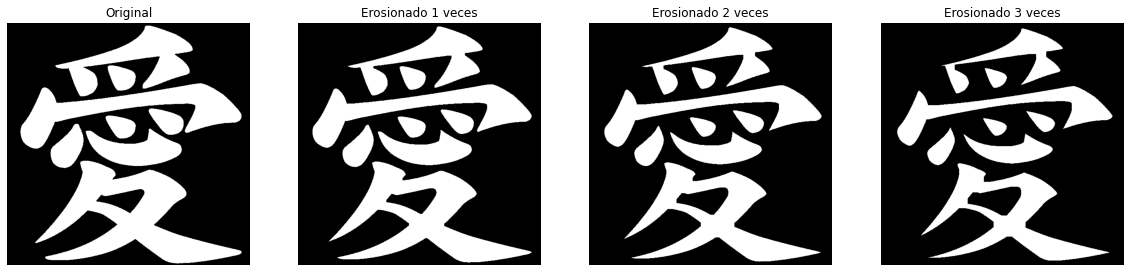

In [11]:
img_kanji = cv2.imread('Imagenes/ai Kanji.png', cv2.IMREAD_GRAYSCALE)

retval, thresh_kanji = cv2.threshold(img_kanji, 0, 255, cv2.THRESH_BINARY_INV| cv2.THRESH_OTSU)

imagenes = [thresh_kanji]
titulos = ['Original']

kernel = np.ones((5,5),np.uint8)

for i in range(0, 3):
    eroded_kanji = cv2.erode(thresh_kanji, kernel, iterations= i+1)
    imagenes.append(eroded_kanji)
    titulos.append("Erosionado {} veces".format(i+1))

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

### Dilatación

Una dilatación es la inversa de la erosión. Una dilatación, al igual que la erosión, hará crecer los píxeles del primer plano. Las dilataciones agrandan los elementos del primer plano y son muy beneficiosas para conectar piezas rotas de una imagen. Las dilataciones, al igual que las erosiones, utilizan elementos estructurantes - un píxel central $p$ del elemento estructurante se pone en blanco si cualquier píxel del elemento estructurante es mayor que 0.

La dilatación consiste en dilatar la superficie exterior (el primer plano) de la imagen. Como las imágenes binarias sólo contienen dos píxeles 0 y 255, implica principalmente la dilatación del primer plano de la imagen y se sugiere que el primer plano sea blanco.

### Uso de OpenCV para implementar dilatación

Es posible realizar la dilatación utilizando la función `cv2.dilate()`. La profundidad de la dilatación viene determinada por el tamaño y la forma del kernel especificado. Para definir un núcleo, podemos utilizar el método `ones()` de NumPy. Otras funciones, como los ceros de NumPy, los kernels personalizados y otros, pueden utilizarse para definir kernels basados en la tarea que se está realizando.

#### Sintaxis de Función

``` python
dst = cv2.dilate(src, kernel, iterations)
```

`dst`: Imagen de destino del mismo tamaño y del mismo tipo que `src`.

La función tiene **4 argumento de entrada requeridos**:

1. `src`: Imagen de entrada; el número de canales puede ser arbitrario, pero la profundidad debe ser una de <code>CV_8U</code>. Es un argumento **obligatorio**.
2. `kernel`: Elemento estructurador utilizado para la erosión. Si este valor es `None`, se utilizará un elemento estructurador de $3×3$. Es un argumento **obligatorio**.
3. `iterations`: Número de veces que se aplica la dilatación. Es un argumento **obligatorio**.



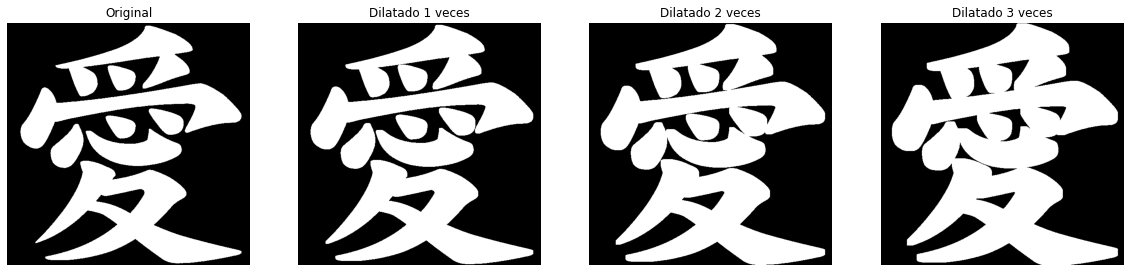

In [12]:
imagenes = [thresh_kanji]
titulos = ['Original']

kernel = np.ones((5,5),np.uint8)

for i in range(0, 3):
    dilated_kanji = cv2.dilate(thresh_kanji, kernel, iterations= i+1)
    imagenes.append(dilated_kanji)
    titulos.append("Dilatado {} veces".format(i+1))

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

A diferencia de una erosión, en la que la región en primer plano se va comiendo poco a poco, una dilatación hace crecer nuestra región en primer plano.

### Apertura

Una apertura es una erosión seguida de una dilatación. Es posible eliminar las pequeñas manchas de una imagen realizando una operación de apertura: primero se realiza una erosión para eliminar las pequeñas manchas y luego se utiliza una dilatación para regenerar el tamaño del elemento original.

### Uso de OpenCV para implementar apertura

Para las siguientes operaciones mofológicas, no existe un comando como con la erosión y dilatación. Es posible realizar la apertura utilizando la función `cv2.morphologyEx()`. Esta función realiza operaciones morfológicas avanzadas, utilizando erosión y dilatación como operaciones básicas.

#### Sintaxis de Función

``` python
dst = cv2.morphologyEx(src, op, kernel, iterations)
```

`dst`: Imagen de destino del mismo tamaño y del mismo tipo que `src`.

La función tiene **4 argumento de entrada requeridos**:

1. `src`: Imagen de entrada; el número de canales puede ser arbitrario, pero la profundidad debe ser una de <code>CV_8U</code>. Es un argumento **obligatorio**.
2. `op`: Tipo de operación morfológica, existen varias tipos de operaciones. Es un argumento **obligatorio**.
3. `kernel`: Elemento estructurador utilizado para la operación. Es un argumento **obligatorio**.
4. `iterations`: Número de veces que se aplica la operación.

**Tipos de operaciones morfológicas**
<ul>
<li><code>cv2.MORPH_ERODE</code>: Erosión
<li><code>cv2.MORPH_DILATE</code>: Dilatación
<li><code>cv2.MORPH_OPEN</code>: Apertura
<li><code>cv2.MORPH_CLOSE</code>: Cerradura
</ul>

<br>

El elemento estructurador debe de ser creado para esta función. Es posible crear el elemento estructurador mediante NumPy, como se vio anteriormente. También, existe la función de OpenCV `cv2.getStructuringElement` que crea el elemento. Este es un equivalente, y se pueden crear varios tipos de elementos estructuradores.

``` python
retval = cv2.getStructuringElement(shape, ksize)
```

`retval`: Devuelve un elemento estructurante del tamaño y la forma especificados para las operaciones morfológicas.

La función tiene **2 argumento de entrada requeridos**:

1. `shape`: Forma de elemento que podría ser una de las formas de morfología. Es un argumento **obligatorio**.
2. `ksize`: Tamaño del elemento estructurante. Es un argumento **obligatorio**.

Primero, se muestra la diferencia para cada uno de los tamaños de kernel, y después, se muestra el resultado para cada iteración.

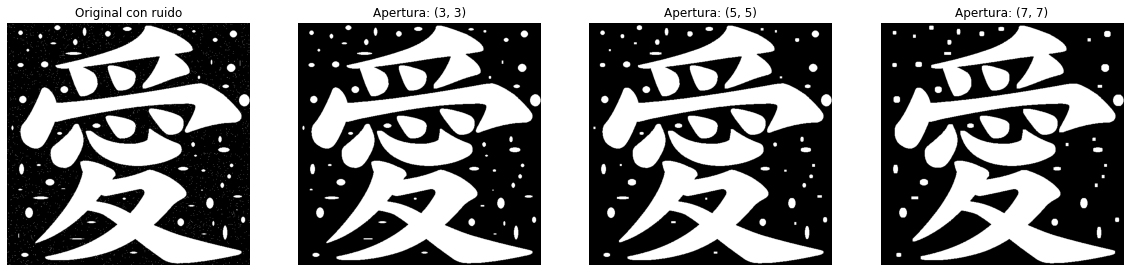

In [13]:
img_kanji_noise = cv2.imread('Imagenes/ai Kanji ruido.png', cv2.IMREAD_GRAYSCALE)

retval, thresh_kanji_noise = cv2.threshold(img_kanji_noise, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)

imagenes = [thresh_kanji_noise]
titulos = ['Original con ruido']
kernelSizes = [(3, 3), (5, 5), (7, 7)]

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    apertura = cv2.morphologyEx(thresh_kanji_noise, cv2.MORPH_OPEN, kernel)
    imagenes.append(apertura)
    titulos.append('Apertura: ({}, {})'.format(kernelSize[0], kernelSize[1]))

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

Ahora, se realizan varias iteraciones utilizando el mejor resultado de las aperturas anteriores, para analizar los resultados.

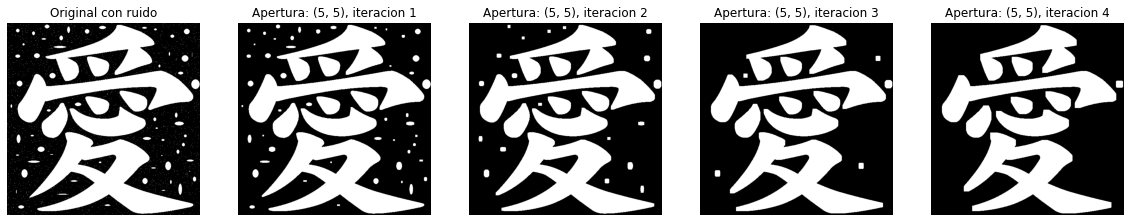

In [18]:
imagenes = [thresh_kanji_noise]
titulos = ['Original con ruido']

kernelSize = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)

for i in range(0, 4):
    apertura = cv2.morphologyEx(thresh_kanji_noise, cv2.MORPH_OPEN, kernel, iterations=i+1)
    imagenes.append(apertura)
    titulos.append('Apertura: ({}, {}), iteracion {}'.format(kernelSize[0], kernelSize[1], i + 1))

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

### Cierre

El cierre implica una dilatación seguida de una erosión en la superficie exterior (el primer plano) de la imagen. Un cierre se utiliza para cerrar agujeros en el interior de los objetos o para conectar componentes entre sí. Para su implementación en OpenCV, se utiliza el mismo procedimiento que para la apertura.

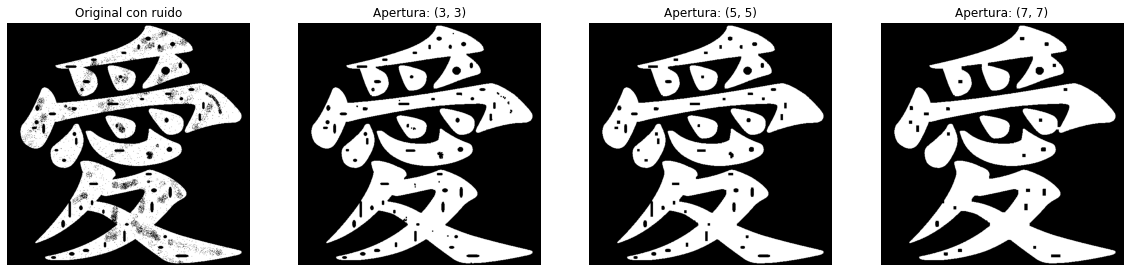

In [19]:
img_kanji_noise = cv2.imread('Imagenes/ai Kanji ruido B.png', cv2.IMREAD_GRAYSCALE)

retval, thresh_kanji_noise = cv2.threshold(img_kanji_noise, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)

imagenes = [thresh_kanji_noise]
titulos = ['Original con ruido']
kernelSizes = [(3, 3), (5, 5), (7, 7)]

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    cerradura = cv2.morphologyEx(thresh_kanji_noise, cv2.MORPH_CLOSE, kernel)
    imagenes.append(cerradura)
    titulos.append('Apertura: ({}, {})'.format(kernelSize[0], kernelSize[1]))

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

Ahora, se realizan varias iteraciones utilizando el mejor resultado de los cierres anteriores, para analizar los resultados.

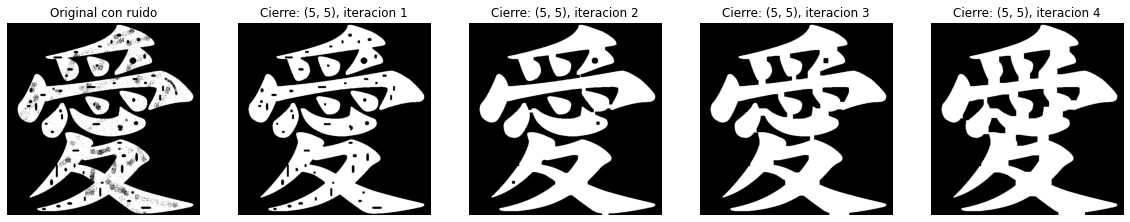

In [23]:
imagenes = [thresh_kanji_noise]
titulos = ['Original con ruido']

kernelSize = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)

for i in range(0, 4):
    cierre = cv2.morphologyEx(thresh_kanji_noise, cv2.MORPH_CLOSE, kernel, iterations=i+1)
    imagenes.append(cierre)
    titulos.append('Cierre: ({}, {}), iteracion {}'.format(kernelSize[0], kernelSize[1], i + 1))

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

Como ultimo ejemplo, se complementan ambros procesos en uno solo apra una aplicación de umbralización y limpieza de imagen mediante operaciones morfológicas. Para esto, se utiliza la siguiente imagen.

<center><img src='Imagenes\Pagina Libro Ingles.jpeg' width=200></center>

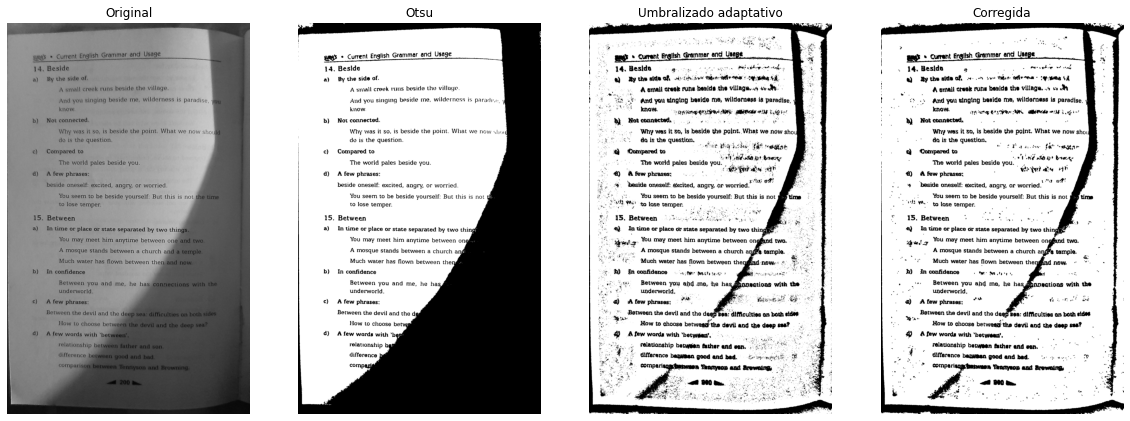

In [25]:
img_libro = cv2.imread('Imagenes/Pagina Libro Ingles.jpeg', cv2.IMREAD_GRAYSCALE)

retval, thresh_libro = cv2.threshold(img_libro, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
adapt_libro = cv2.adaptiveThreshold(img_libro, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 99, 3)

kernelSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
apertura = cv2.morphologyEx(adapt_libro, cv2.MORPH_CLOSE, kernel, iterations=1)


imagenes = [img_libro, thresh_libro, adapt_libro, apertura]
titulos = ['Original', 'Otsu', 'Umbralizado adaptativo', 'Corregida']

plot_img(imagenes, titulos)


## Ejercicios

<ol>
<li>
Coloque una cámara web en una posición estática. Diseñar un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Tomar una foto del fondo desde la cámara.</il>
    <li>Sin mover la cámara, poner un objeto en la escena y tomar una segunda foto.</li>
    <li>Convertir estas imagenes a escala de grises.</li>
    <li>Restar las dos imágenes y mostrar el resultado en una ventana.</li>
    <li>Realizar el umbralizado de la imagen restada y mostrar el resultado en otra ventana.</li>
    <li>A la imagen umbralizada realizar las operaciones de erosión, dilatación, apertura y cierre por separado y mostrar los resultados en diferentes ventanas.</li>
    <li>Aplicar la mascara resultante a la segunda imagen capturada.</li>
    </ul>
</li>
<br>
<li>
Diseñar un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargar un video del disco duro.</il>
    <li>Convertir los fotogramas a escala de grises.</li>
    <li>Restar fotograma actual con fotograma anterior tomando su resta de valor absoluto.</li>
    <li>Realizar el umbralizado de la imagen restada.</li>
    <li>Aplicar un dilatado a la imagen umbralizada.</li>
    <li>Encuentrar las áreas que ha cambiado de fotograma en fotograma (Usar <code>cv2.findContours</code>).</li>
    <li>Encapsular en un cuadrado las áreas que han cambiado de fotograma en fotograma.</li>
    </ul>
</li>
</ol>
<br>